# 1. IMPORTING LIBRARIES

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# 2.LOADING THE DATASETS

In [4]:
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# Define column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 
                 'sex', 'hours-per-week', 'native-country', 'income']

# Load the datasets
df_train = pd.read_csv(train_url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)
df_test = pd.read_csv(test_url, header=None, names=column_names, na_values=' ?', skipinitialspace=True, skiprows=1)



# 3. DATA EXPLORARATION AND VISUALIZATION

### SUMMARY STATISTICS  

In [21]:
print(df_train.describe(include='all'))
print(df_train.info())

                 age workclass        fnlwgt           education  \
count   3.256100e+04     32561  32561.000000               32561   
unique           NaN        16           NaN                   7   
top              NaN   HS-grad           NaN  Married-civ-spouse   
freq             NaN     10501           NaN               14976   
mean    1.897784e+05       NaN     10.080679                 NaN   
std     1.055500e+05       NaN      2.572720                 NaN   
min     1.228500e+04       NaN      1.000000                 NaN   
25%     1.178270e+05       NaN      9.000000                 NaN   
50%     1.783560e+05       NaN     10.000000                 NaN   
75%     2.370510e+05       NaN     12.000000                 NaN   
max     1.484705e+06       NaN     16.000000                 NaN   

         education-num marital-status occupation relationship          race  \
count            32561          32561      32561        32561  32561.000000   
unique              15   

### DISTRIBUTION OF INCOME(TARGET VALUE)

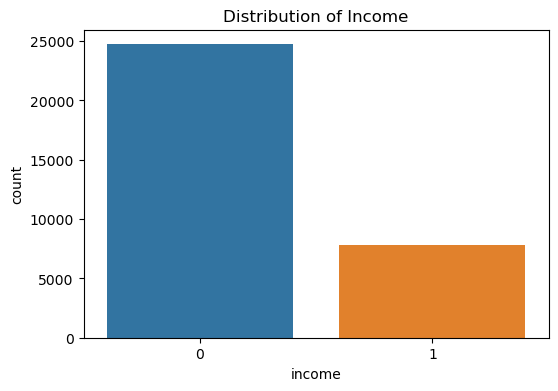

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df_train)
plt.title('Distribution of Income')
plt.show()


### UNDERSTANDING FEATURES

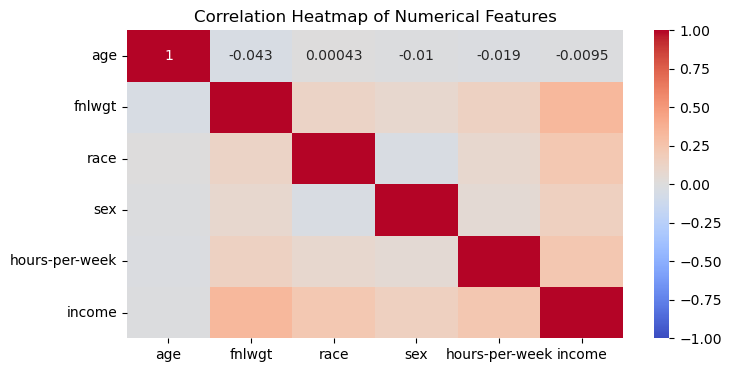

In [47]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 4))
correlation_matrix = df_train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


###  CHECKING FOR MISSING VALUES

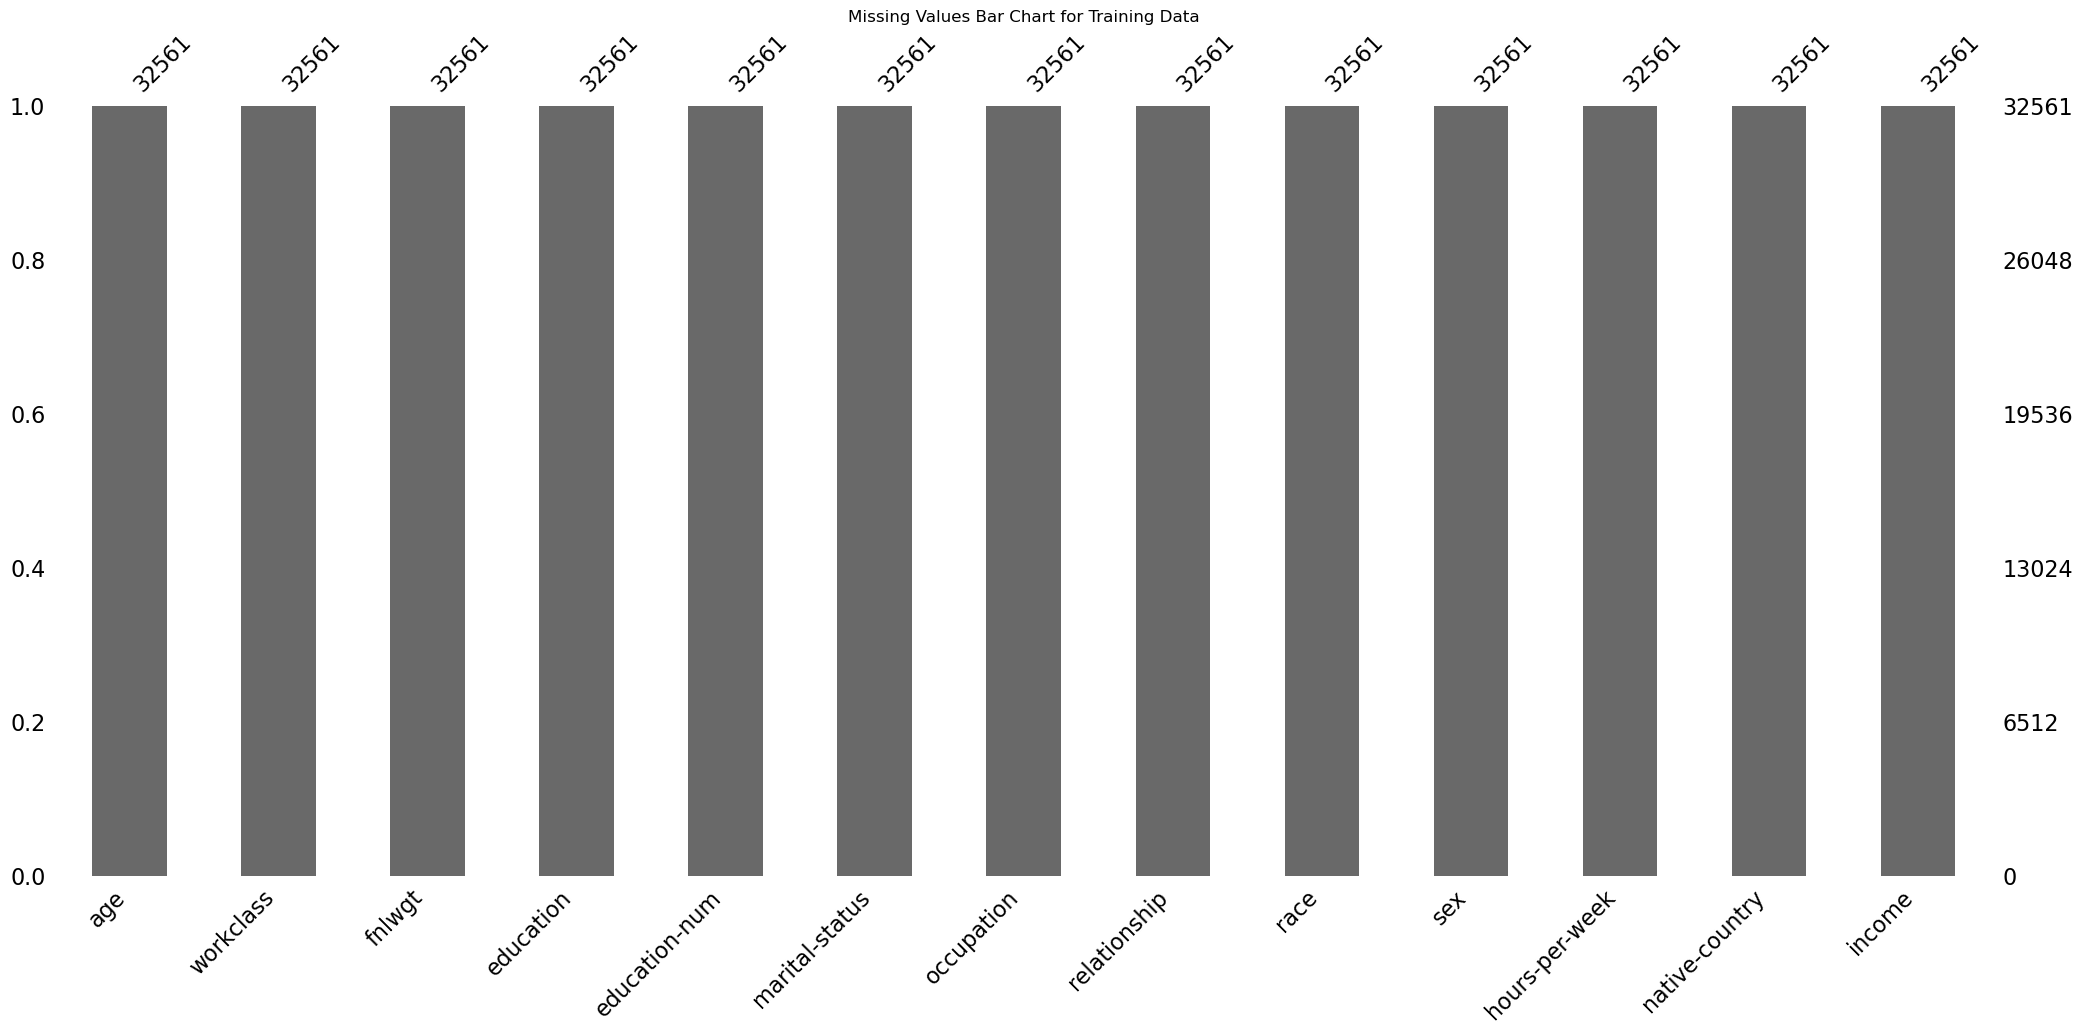

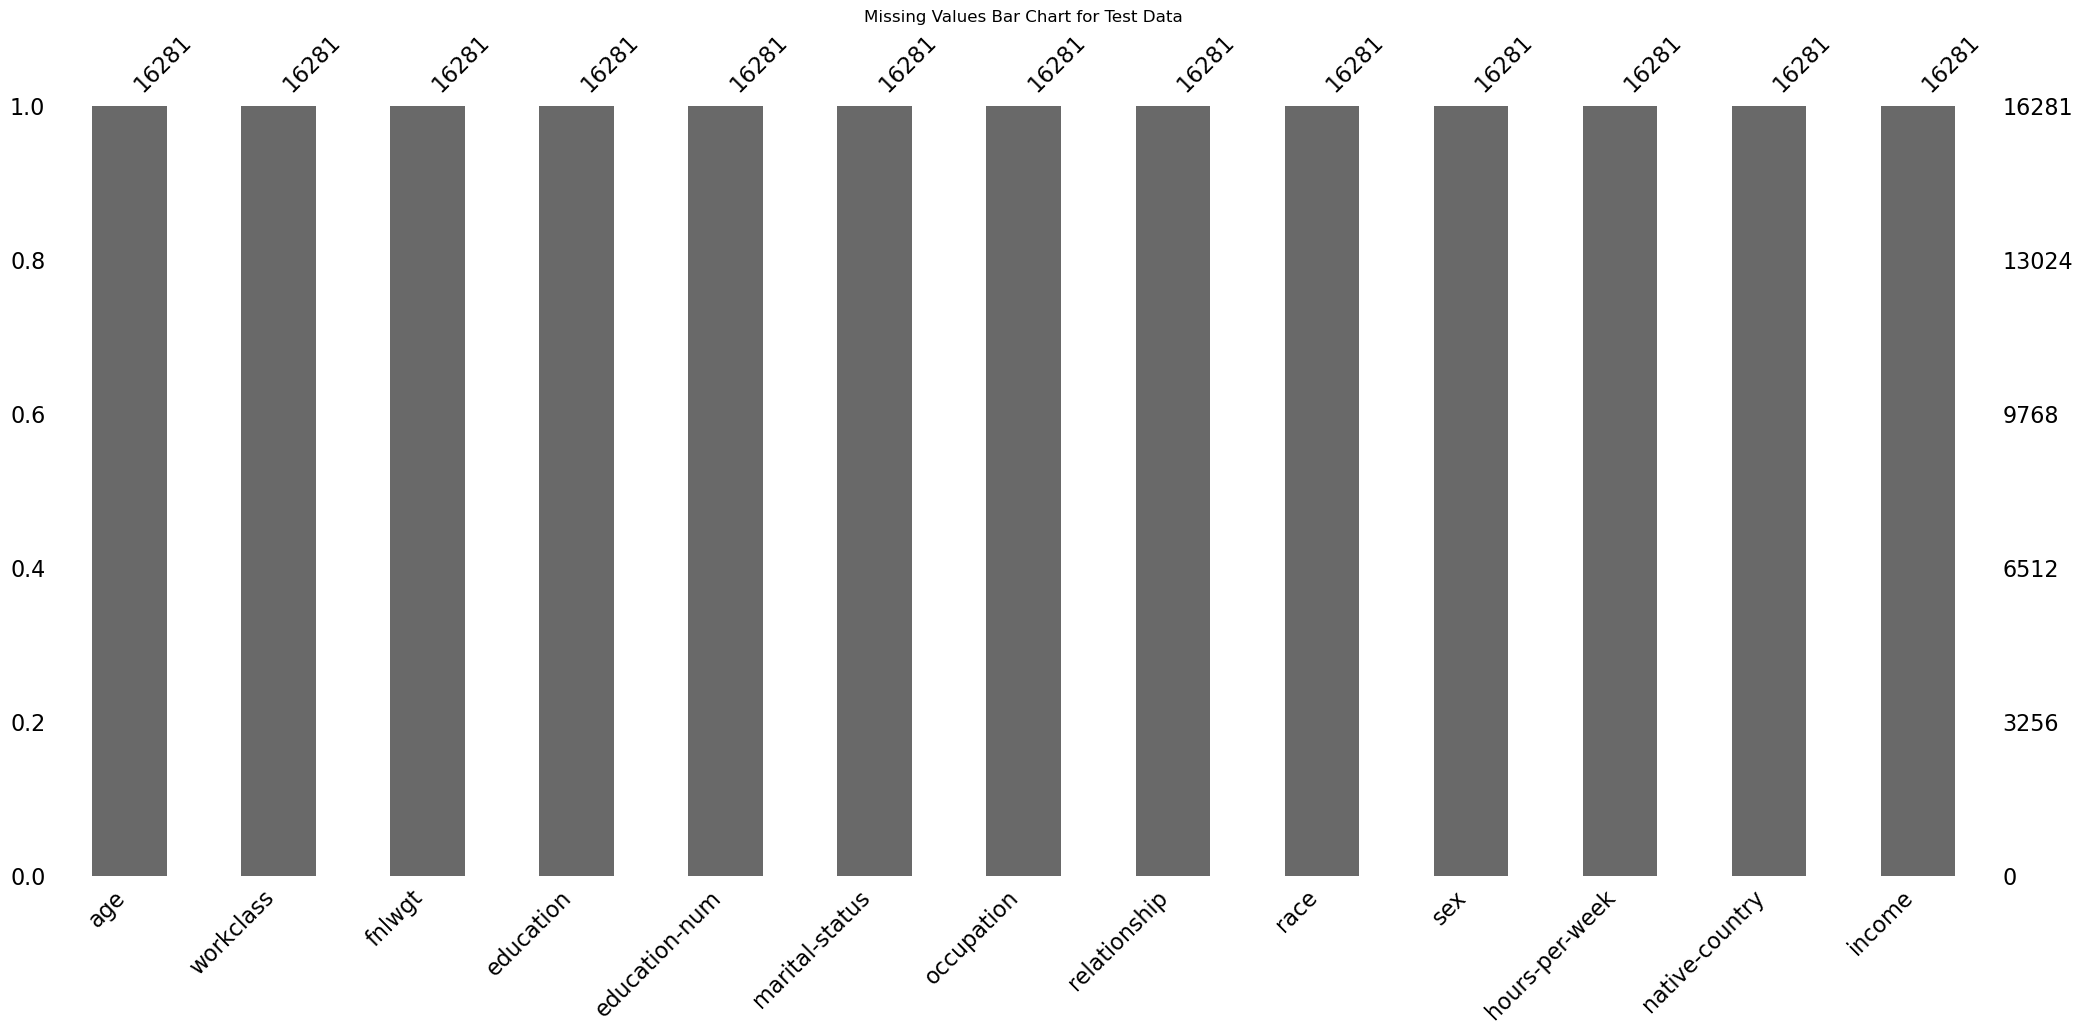

In [25]:
# Visualize missing value bar chart for the training dataset
plt.figure(figsize=(12, 8))
msno.bar(df_train)
plt.title('Missing Values Bar Chart for Training Data')
plt.show()

# Visualize missing value bar chart for the test dataset
plt.figure(figsize=(12, 8))
msno.bar(df_test)
plt.title('Missing Values Bar Chart for Test Data')
plt.show()

# 4.DATA PREPROCESSING 

In [8]:
# Replace '?' with NaN
df_test.replace(' ?', pd.NA, inplace=True)

In [51]:
# Fix inconsistent income labels in test data
df_test['income'] = df_test['income'].replace('<=50K.', '<=50K').replace('>50K.', '>50K')

# Check for any remaining inconsistencies
print("Unique values in income column after fixing:\n", df_test['income'].unique())

# Replace '?' with NaN
df_test.replace(' ?', pd.NA, inplace=True)
# Initialize and fit the encoder
income_encoder = LabelEncoder()
income_encoder.fit(df_train['income'])


# Encode categorical variables
label_encoders = {}
for column in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(df_train[column].astype(str))  # Fit on training data
    df_train[column] = le.transform(df_train[column].astype(str))
    df_test[column] = le.transform(df_test[column].astype(str))
    label_encoders[column] = le

# Encode the target variable separately
income_encoder = LabelEncoder()
df_train['income'] = income_encoder.fit_transform(df_train['income'])
df_test['income'] = income_encoder.transform(df_test['income'])

# Separate features and target variable
X_train = df_train.drop('income', axis=1)
y_train = df_train['income']
X_test = df_test.drop('income', axis=1)
y_test = df_test['income']


Unique values in income column after fixing:
 [0 1]


# 5.MODEL TRAINING AND EVALUATION 

In [20]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))




# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


C:\Users\umer5\Documents\project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.66      0.33      0.44      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.64      0.66     16281
weighted avg       0.78      0.80      0.78     16281

Accuracy: 0.8021006080707573
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12435
           1       0.68      0.61      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.76      0.77     16281
weighted avg       0.84      0.84      0.84     16281

Accuracy: 0.8403046495915484


# 6.IMPROVING MODEL PERFORMANCE 

### SCALING THE DATA 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report with Scaled Data:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Classification Report with Scaled Data:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.71      0.43      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281

Accuracy: 0.8233523739328051


### BALANCING THE DATA 

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weights balanced
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

# Print classification report and accuracy
print("Logistic Regression Classification Report with Balanced Weights:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Classification Report with Balanced Weights:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     12435
           1       0.49      0.73      0.58      3846

    accuracy                           0.76     16281
   macro avg       0.69      0.75      0.71     16281
weighted avg       0.80      0.76      0.77     16281

Accuracy: 0.7559117990295436


### HYPERPARAMETER TUNING

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 2000, 3000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_log_reg = best_model.predict(X_test_scaled)
print("Best Logistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Best Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.71      0.43      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281

Accuracy: 0.8234137952214238


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Print classification report and accuracy
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12435
           1       0.68      0.61      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.76      0.77     16281
weighted avg       0.84      0.84      0.84     16281

Accuracy: 0.8406117560346416


# 7. GRADIENT BOOSTING CLASSIFIER

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb = gb_clf.predict(X_test_scaled)

# Print classification report and accuracy
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.80      0.58      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.84      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281

Accuracy: 0.8649960076162397


# 8.RESULT ANALYSIS

## 1.FEATURE IMPORTANCE 

### LOGISTIC REGRESSION

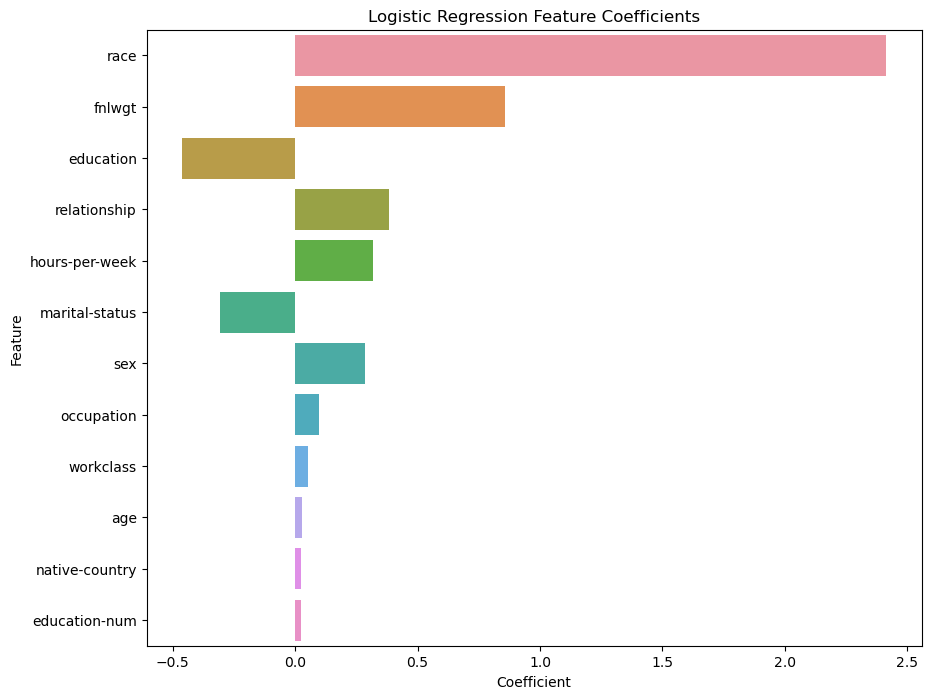

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame for visualization
features = X_train.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by absolute value of coefficients
coefficients_df['abs_coef'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='abs_coef', ascending=False).drop(columns=['abs_coef'])

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Logistic Regression Feature Coefficients')
plt.show()


### RANDOM FOREST 

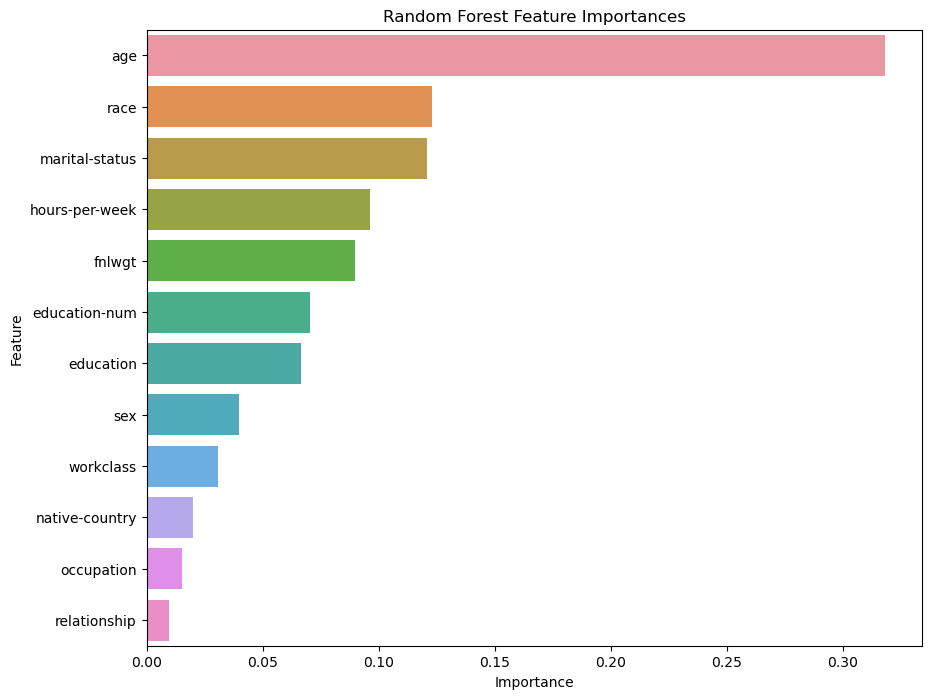

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.show()


### GRADIENT BOOSTING CLASSIFIER

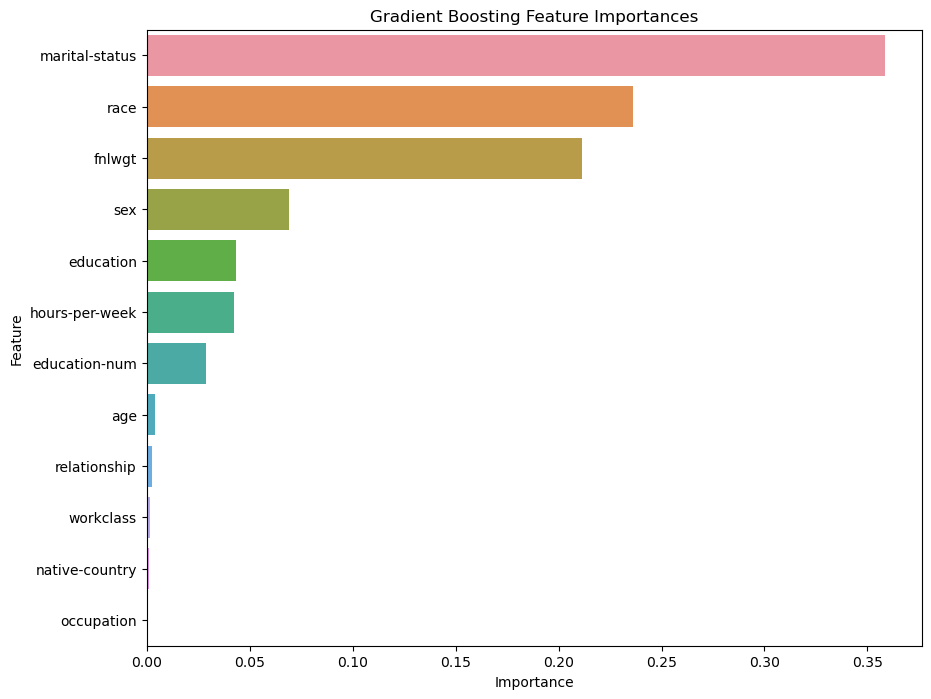

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gb_clf.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Gradient Boosting Feature Importances')
plt.show()


## 2.EVALUATION METRICS 


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.80      0.58      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.84      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281

Accuracy: 0.8649960076162397


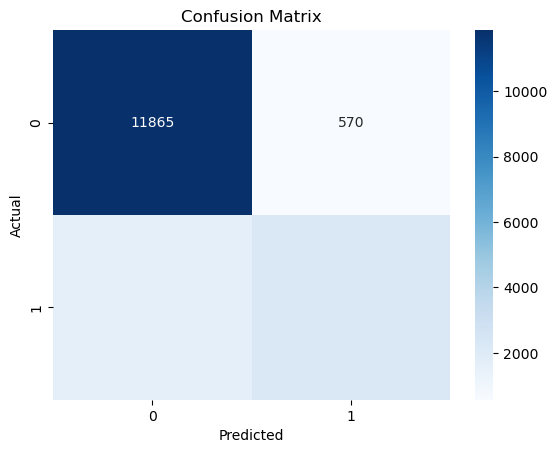

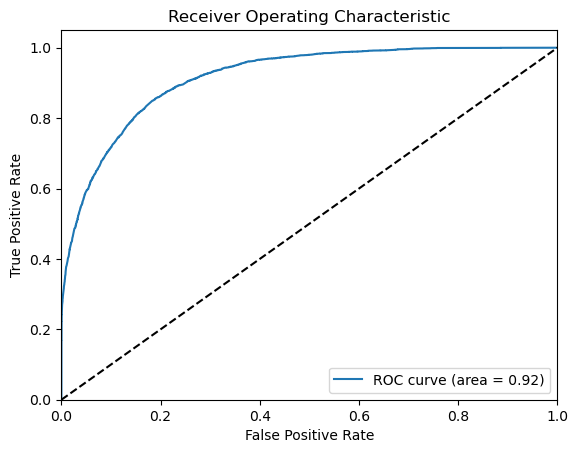

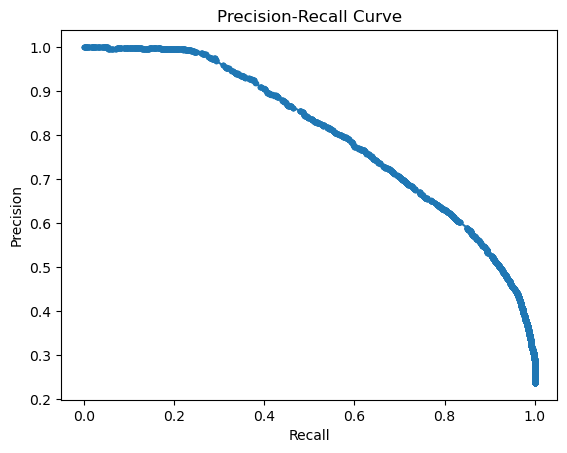

F1 Score: 0.6686765149231233


In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score

# Predictions
y_pred = gb_clf.predict(X_test_scaled)
y_prob = gb_clf.predict_proba(X_test_scaled)[:, 1]

# Classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


## 3.CROSS VALIDATION

In [31]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(gb_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.85567327 0.86025799 0.86179361 0.8647113  0.86455774]
Mean cross-validation score: 0.8613987815335122


Distribution of Predicted Classes by Gradient Boosting:
{0: 13493, 1: 2788}


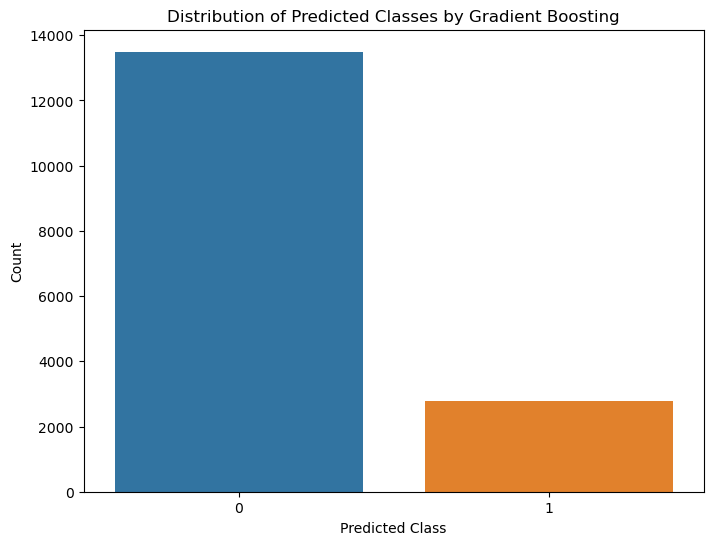

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Gradient Boosting Model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gb_clf.predict(X_test_scaled)

# Analyze the predictions
unique, counts = np.unique(y_pred_gb, return_counts=True)
predictions_count = dict(zip(unique, counts))

print("Distribution of Predicted Classes by Gradient Boosting:")
print(predictions_count)

# Visualize the distribution of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_gb)
plt.title('Distribution of Predicted Classes by Gradient Boosting')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()


In [53]:
# Check the type of the model
print("Model type:", type(best_model))


Model type: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
